In [83]:
import pymc3 as pm
import numpy as np
import pandas as pd
from theano import shared
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

In [84]:
az.style.use('arviz-darkgrid')

## Simple linear regression

In [85]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real #add noise

# we can center the data
#x = x - x.mean()
# or standardize the data
#x = (x - x.mean())/x.std()
#y = (y - y.mean())/y.std()

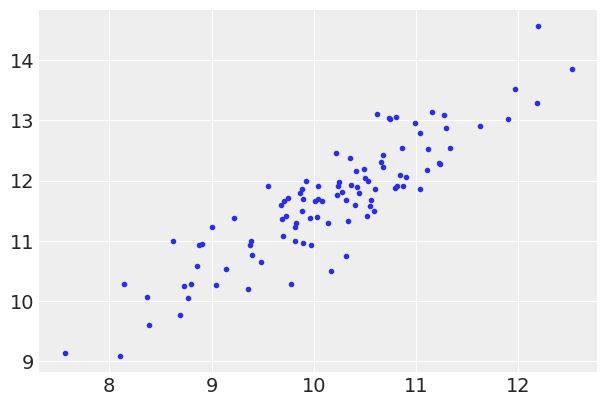

In [86]:
plt.plot(x,y,'.')

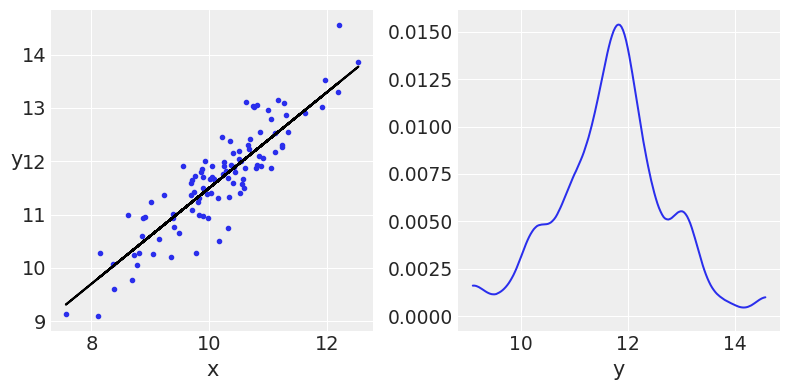

In [87]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()
plt.savefig('B11197_03_02.png', dpi=300)

In [97]:
type(β)

pymc3.model.FreeRV

In [98]:
μ

μ

In [99]:
y_pred

y_pred

In [100]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x) 
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_g = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:10<00:00, 1099.34draws/s]


In [ ]:
#    μ = pm.Deterministic('μ', α + β * x) #why need this line
# how the model know the final form of the prob function?

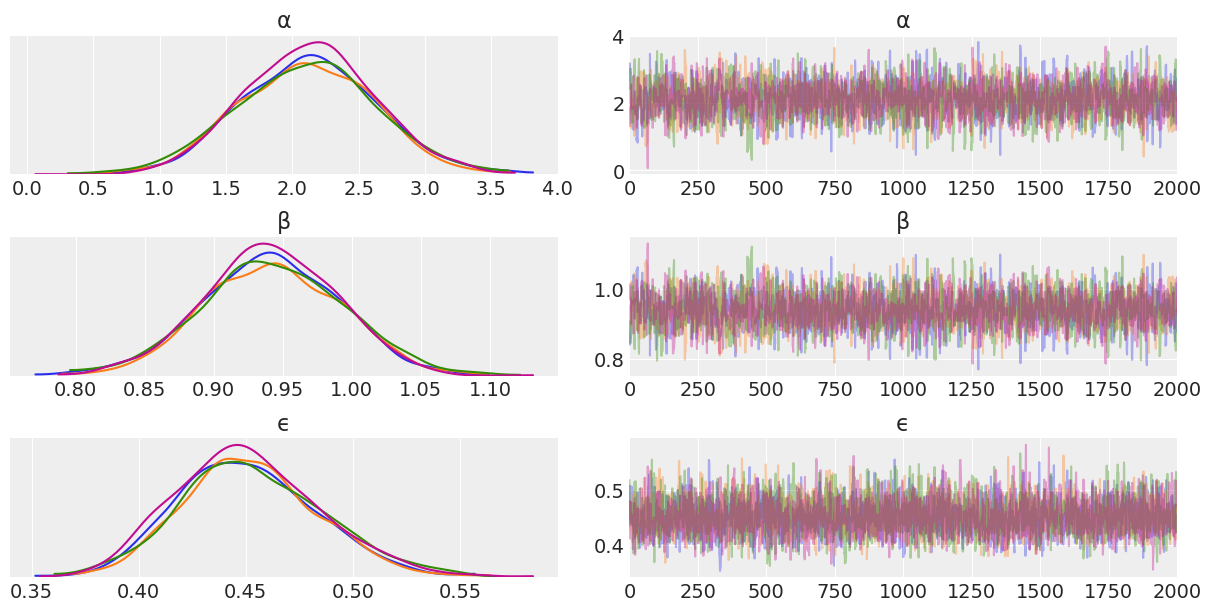

In [89]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])
plt.savefig('B11197_03_03.png', dpi=300)

In [2]:
#az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ','μ']) #'μ[1]' is not in the var list
#plt.savefig('B11197_03_03_test.png', dpi=300)

In [90]:
az.summary(trace_g)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,2.11,0.50,0.01,1.17,3.05,2398.0,1.0
β,0.94,0.05,0.00,0.85,1.04,2399.0,1.0
ϵ,0.45,0.03,0.00,0.39,0.51,3703.0,1.0
μ[0],11.10,0.05,0.00,11.01,11.21,4436.0,1.0
μ[10],10.23,0.09,0.00,10.06,10.39,2836.0,1.0
μ[11],11.82,0.05,0.00,11.73,11.90,7527.0,1.0
μ[12],12.32,0.06,0.00,12.21,12.42,4588.0,1.0
μ[13],10.71,0.07,0.00,10.59,10.84,3331.0,1.0
μ[14],11.85,0.05,0.00,11.77,11.94,7369.0,1.0
μ[15],10.29,0.09,0.00,10.13,10.45,2872.0,1.0


In [91]:
with pm.Model() as model_g2:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g2 = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:11<00:00, 1079.83draws/s]
The acceptance probability does not match the target. It is 0.6915483495766275, but should be close to 0.8. Try to increase the number of tuning steps.


In [92]:
az.summary(trace_g2)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,2.10,0.50,0.01,1.16,3.03,2554.0,1.0
β,0.94,0.05,0.00,0.85,1.04,2554.0,1.0
ϵ,0.45,0.03,0.00,0.40,0.52,3727.0,1.0


### test different model

In [107]:
with pm.Model() as model_g3:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    #μ = pm.Deterministic('μ', α + β * x) 
    #y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_g3 = pm.sample(200, tune=100)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 1200/1200 [00:00<00:00, 3119.39draws/s]


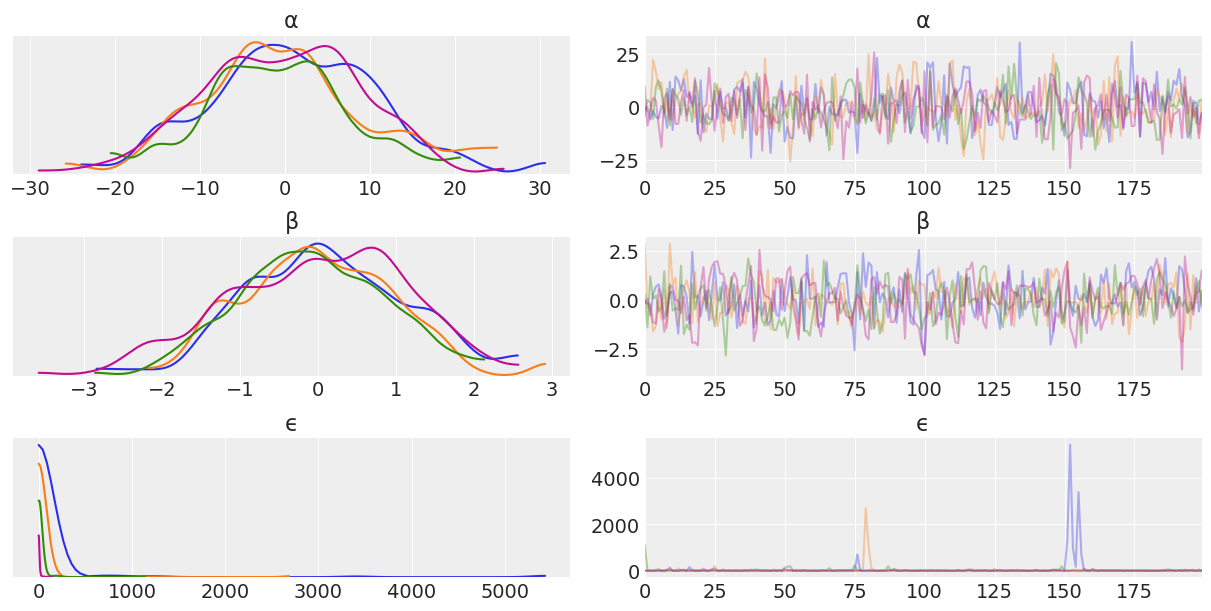

In [108]:
az.plot_trace(trace_g3, var_names=['α', 'β', 'ϵ'])
plt.savefig('B11197_03_03_test3.png', dpi=300)

In [116]:
with pm.Model() as model_g4:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x) 
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_g4 = pm.sample(200, tune=100)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 1200/1200 [00:01<00:00, 611.59draws/s]
The acceptance probability does not match the target. It is 0.9432575145190385, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9541589361094128, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9321919678241225, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9215879959737362, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective sampl

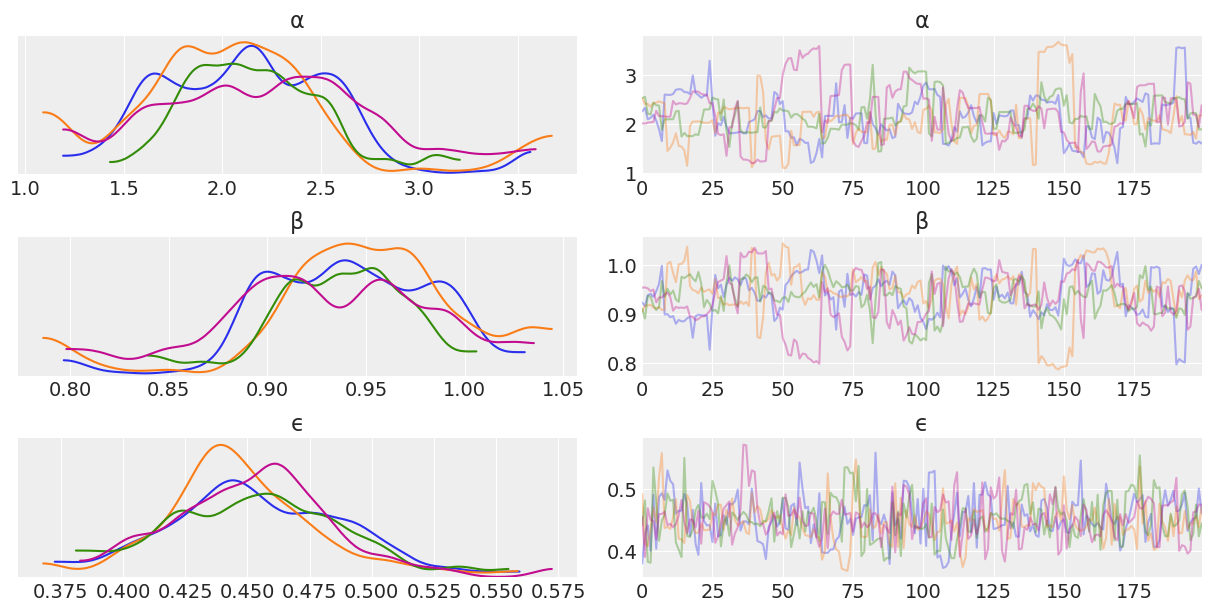

In [114]:
az.plot_trace(trace_g4, var_names=['α', 'β', 'ϵ'])
plt.savefig('B11197_03_03_test4.png', dpi=300)

### Modyfing the data before running the models

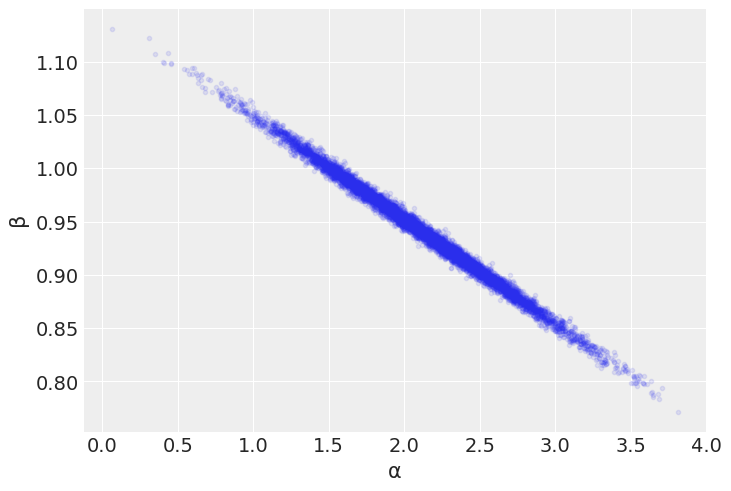

In [14]:
az.plot_pair(trace_g, var_names=['α', 'β'],plot_kwargs={'alpha': 0.1}) #alpha add transparancy
plt.savefig('B11197_03_04.png', dpi=300)

### interpreting the posterior

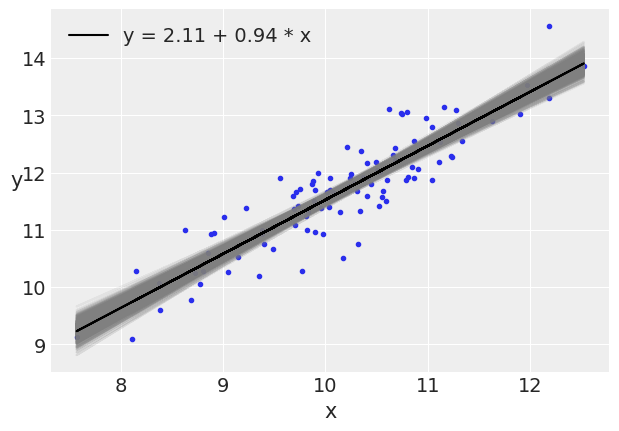

In [121]:
plt.plot(x, y, 'C0.')

alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()

draws = range(0, len(trace_g['α']), 10)
plt.plot(x, trace_g['α'][draws] + trace_g['β'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.1) #change alpha=0.5 to 0.1

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.savefig('B11197_03_05.png', dpi=300)

Interesting to see the spreading of the lines which all go through a region close to the mean of x and y. Then what changes how close the lines to the means?

In [22]:
x.shape,x[:,np.newaxis].shape

((100,), (100, 1))

In [17]:
alpha_m,beta_m

(2.1100679924620738, 0.9412724585226296)

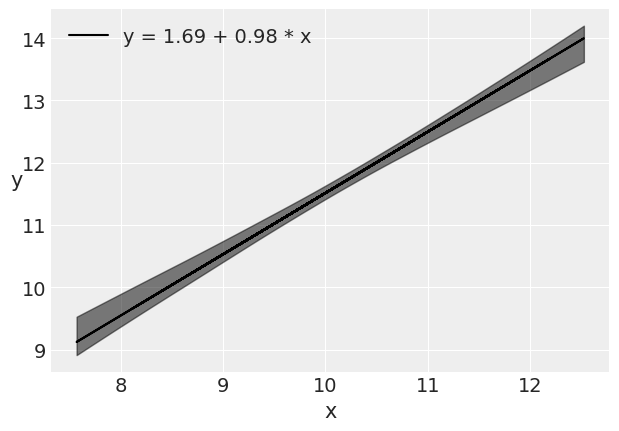

In [117]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hpd(x, trace_g['μ'], credible_interval=0.98, color='k')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.savefig('B11197_03_06.png', dpi=300)

How the trance mu works?

In [118]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

100%|██████████| 2000/2000 [00:01<00:00, 1942.22it/s]


In [119]:
ppc

{'y_pred': array([[10.94883963, 12.11684803, 11.72172537, ..., 12.22089886,
         13.01462397, 13.06077366],
        [11.09558959, 11.55097271, 10.91683397, ..., 11.87064481,
         12.28427069, 12.32339403],
        [12.15060012, 12.83455223, 10.79109166, ..., 13.06526402,
         11.90780676, 12.20623243],
        ...,
        [10.11646326, 12.24570094, 11.31162554, ..., 12.36160894,
         12.34969697, 12.69582902],
        [11.37811993, 12.58728895, 12.49129542, ..., 13.17530554,
         12.78591868, 11.69810588],
        [11.37786639, 12.93073759, 12.36383983, ..., 11.51088459,
         12.04622141, 13.53524732]])}

In [123]:
y.shape

(100,)

In [124]:
ppc['y_pred'].shape

(2000, 100)

In [125]:
x.shape

(100,)

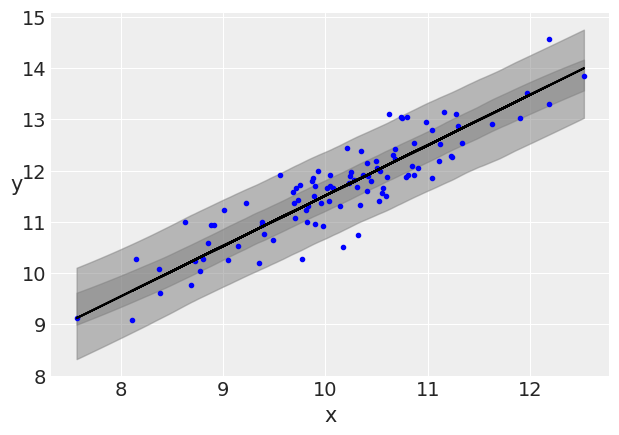

In [120]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hpd(x, ppc['y_pred'], credible_interval=0.5, color='gray')
az.plot_hpd(x, ppc['y_pred'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('B11197_03_07.png', dpi=300)

In [12]:
az.r2_score(y, ppc['y_pred'])

r2        0.785829
r2_std    0.005855
dtype: float64

### test priori

In [22]:
with pm.Model() as model_g2:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g2 = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:11<00:00, 1044.62draws/s]


In [28]:
trace_g2.varnames

['α', 'β', 'ϵ_log__', 'ϵ']

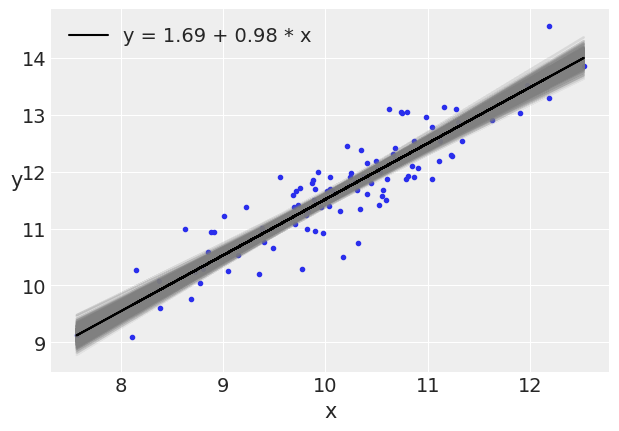

In [23]:
plt.plot(x, y, 'C0.')

alpha_m = trace_g2['α'].mean()
beta_m = trace_g2['β'].mean()

draws = range(0, len(trace_g2['α']), 10)
plt.plot(x, trace_g2['α'][draws] + trace_g2['β'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.1) #change alpha=0.5 to 0.1

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.savefig('B11197_03_05.png', dpi=300)

In [15]:
with pm.Model() as model_g2:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g2 = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:11<00:00, 1042.45draws/s]
The acceptance probability does not match the target. It is 0.884593335424659, but should be close to 0.8. Try to increase the number of tuning steps.


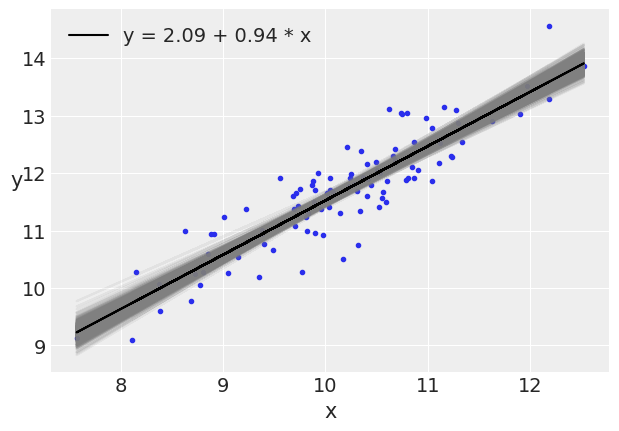

In [19]:
plt.plot(x, y, 'C0.')

alpha_m = trace_g2['α'].mean()
beta_m = trace_g2['β'].mean()

draws = range(0, len(trace_g2['α']), 10)
plt.plot(x, trace_g2['α'][draws] + trace_g2['β'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.1) #change alpha=0.5 to 0.1

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.savefig('B11197_03_05.png', dpi=300)

In [20]:
with pm.Model() as model_g2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=100)
    ϵ = pm.HalfCauchy('ϵ', 100)
    y_pred = pm.Normal('y_pred', mu=α + β * x, sd=ϵ, observed=y)

    trace_g2 = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:12<00:00, 971.66draws/s] 
The acceptance probability does not match the target. It is 0.8824974173192076, but should be close to 0.8. Try to increase the number of tuning steps.


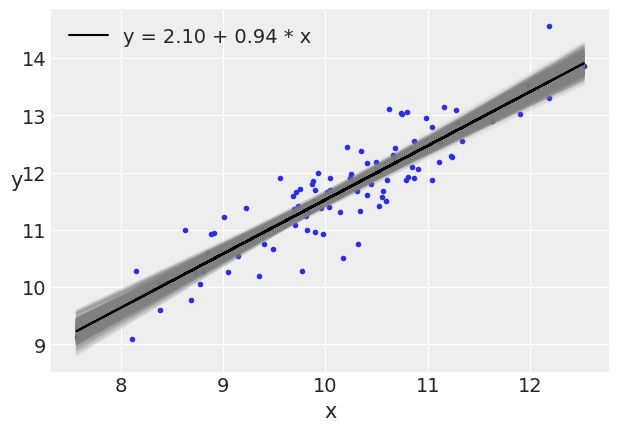

In [21]:
plt.plot(x, y, 'C0.')

alpha_m = trace_g2['α'].mean()
beta_m = trace_g2['β'].mean()

draws = range(0, len(trace_g2['α']), 10)
plt.plot(x, trace_g2['α'][draws] + trace_g2['β'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.1) #change alpha=0.5 to 0.1

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.savefig('B11197_03_05.png', dpi=300)

### The multivariate normal distribution 
Actually the bivariate

In [43]:
rv.pdf?

In [44]:
pos.shape?

In [47]:
rv.rvs(4)

array([[ 1.29138455,  3.96889956],
       [-2.0570024 , -3.0586092 ],
       [-0.59516883, -0.03819401],
       [-0.92260377, -1.922664  ]])

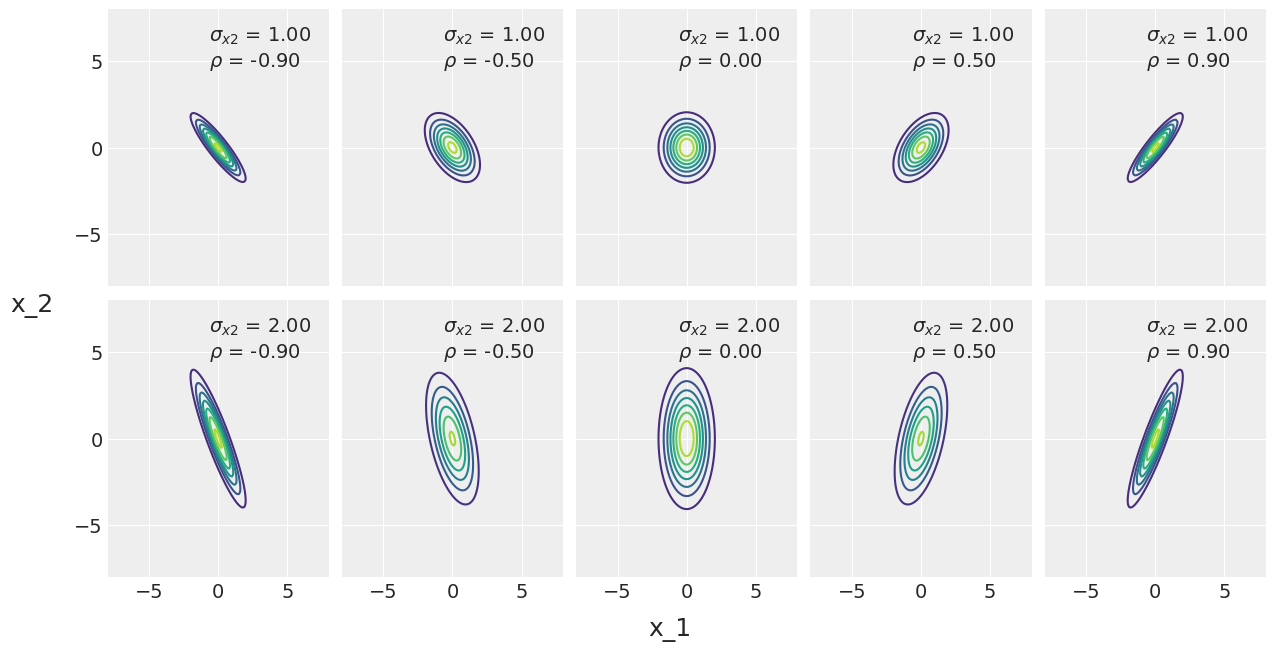

In [49]:
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.90, -0.5, 0, 0.5, 0.90]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, figsize=(12, 6),
                     constrained_layout=True)
for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        #ax[i, j].plot(rv.rvs(100)[:,0],rv.rvs(100)[:,1],'.')
        ax[i, j].contour(k, l,rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0,
                      label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)
plt.savefig('B11197_03_08.png', dpi=300)

### play with the samples with no correlation

(-4, 4, -4, 4)

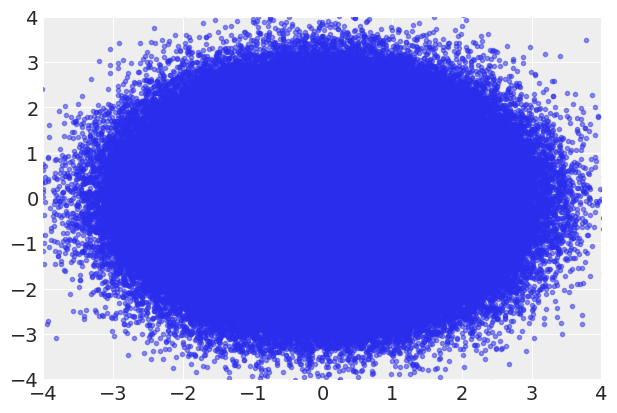

In [76]:
x1=np.random.randn(1000000)
x2=np.random.randn(1000000)

plt.plot(x1,x2,'.',alpha=0.5)
plt.axis((-4,4,-4,4))

(-4, 4, -4, 4)

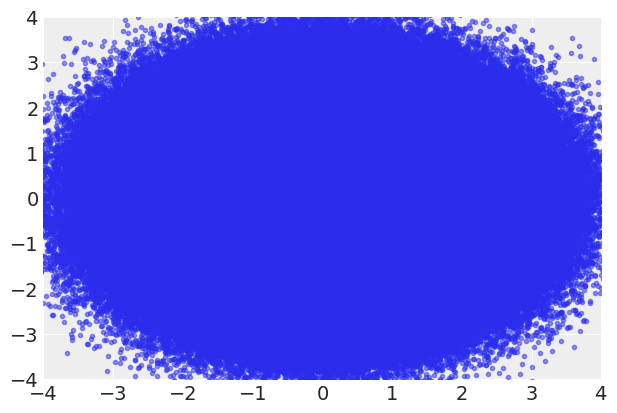

In [78]:
x1=np.random.randn(10000000)
x2=np.random.randn(10000000)

plt.plot(x1,x2,'.',alpha=0.5)
plt.axis((-4,4,-4,4))

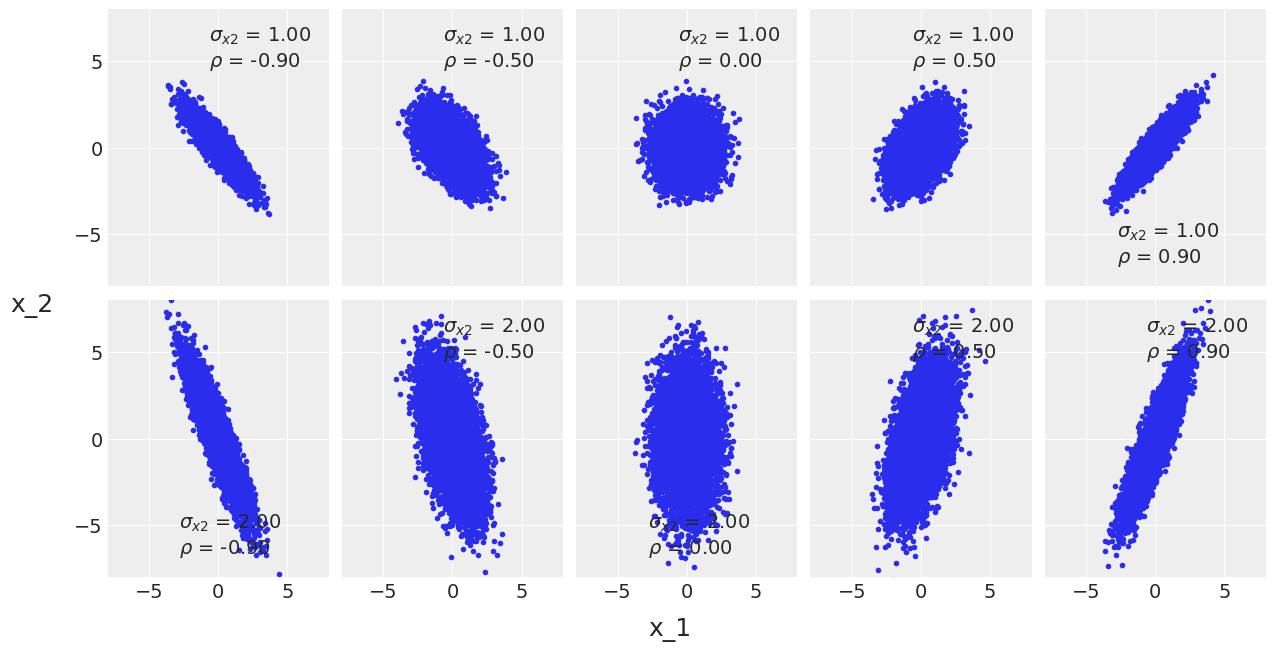

In [77]:
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.90, -0.5, 0, 0.5, 0.90]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, figsize=(12, 6),
                     constrained_layout=True)
for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        tmp=rv.rvs(10000)
        ax[i, j].plot(tmp[:,0],tmp[:,1],'.')
        #ax[i, j].contour(k, l,rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        #ax[i, j].set_xlim(-1, 1)
        #ax[i, j].set_ylim(-1, 1)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0,
                      label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)
plt.savefig('B11197_03_08.png', dpi=300)

### continue with the multi-variant distribution

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = np.stack((x, y)).T
with pm.Model() as pearson_model:

    μ = pm.Normal('μ', mu=data.mean(0), sd=10, shape=2)

    σ_1 = pm.HalfNormal('σ_1', 10)
    σ_2 = pm.HalfNormal('σ_2', 10)
    ρ = pm.Uniform('ρ', -1., 1.)
    r2 = pm.Deterministic('r2', ρ**2)

    cov = pm.math.stack(([σ_1**2, σ_1*σ_2*ρ],
                         [σ_1*σ_2*ρ, σ_2**2]))

    y_pred = pm.MvNormal('y_pred', mu=μ, cov=cov, observed=data)

    trace_p = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ρ, σ_2, σ_1, μ]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:09<00:00, 655.30draws/s]
The acceptance probability does not match the target. It is 0.8860536505472588, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8803462035809972, but should be close to 0.8. Try to increase the number of tuning steps.


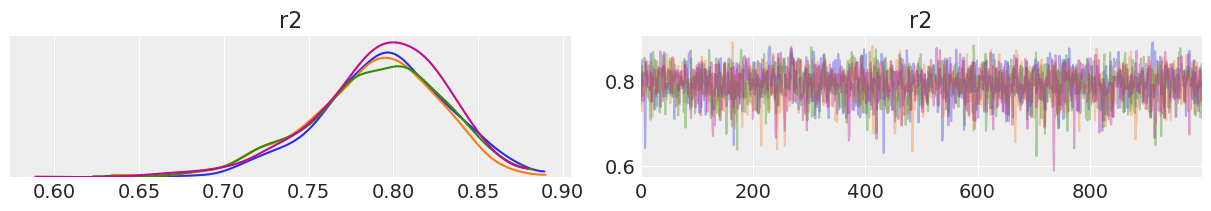

In [38]:
az.plot_trace(trace_p, var_names=['r2'])
plt.savefig('B11197_03_9.png', dpi=300)

In [27]:
trace_p.varnames

['μ', 'σ_1_log__', 'σ_2_log__', 'ρ_interval__', 'σ_1', 'σ_2', 'ρ', 'r2']

In [25]:
az.summary(trace_p, var_names=['r2'])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
r2,0.79,0.04,0.0,0.72,0.86,2080.0,1.0


## Robust linear regression

In [17]:
ans = pd.read_csv('../data/anscombe.csv')
x_3 = ans[ans.group == 'III']['x'].values
y_3 = ans[ans.group == 'III']['y'].values
x_3 = x_3 - x_3.mean()

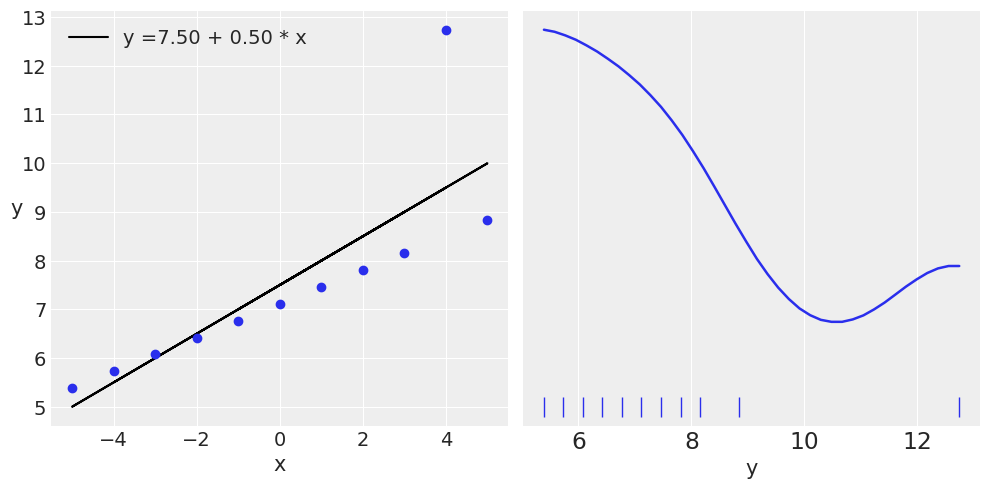

In [18]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
ax[0].plot(x_3, (alpha_c + beta_c * x_3), 'k',
           label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x')
ax[0].plot(x_3, y_3, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)
az.plot_kde(y_3, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()
plt.savefig('B11197_03_10.png', dpi=300)

In [19]:
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_3.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_3,
                         sd=ϵ, nu=ν, observed=y_3)

    trace_t = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν_, ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:06<00:00, 739.17draws/s] 
The acceptance probability does not match the target. It is 0.8814466002199226, but should be close to 0.8. Try to increase the number of tuning steps.


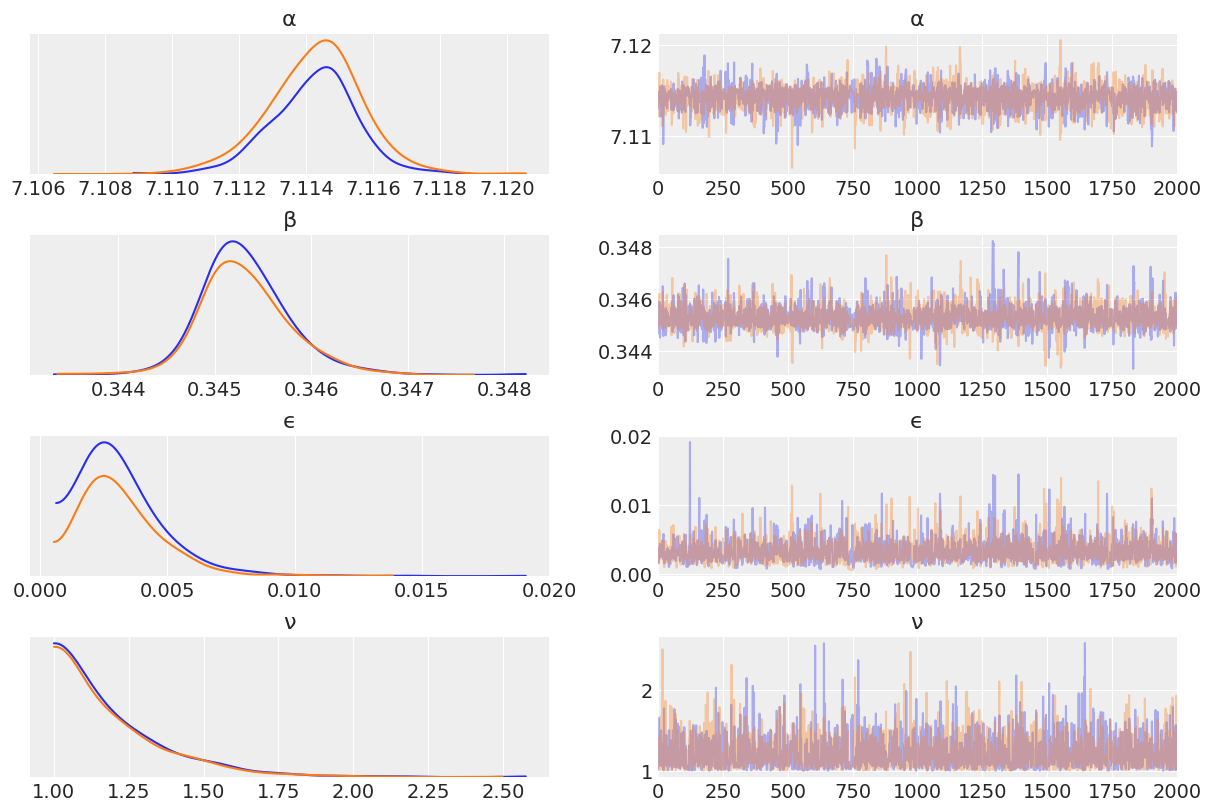

In [20]:
varnames = ['α', 'β', 'ϵ', 'ν']
az.plot_trace(trace_t, var_names=varnames);

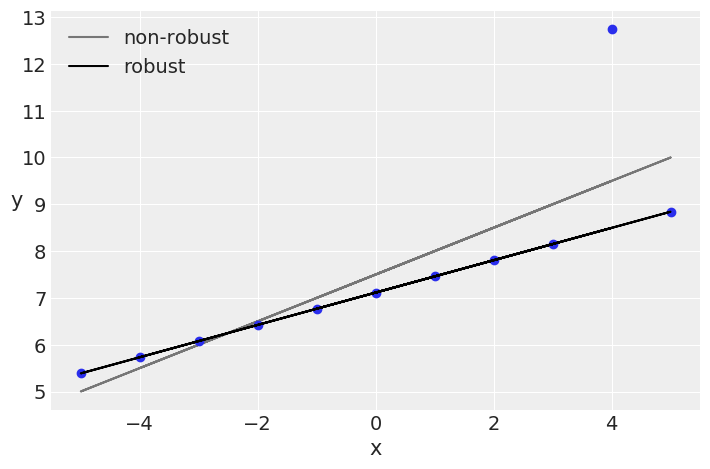

In [21]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]

plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='non-robust', alpha=0.5)
plt.plot(x_3, y_3, 'C0o')
alpha_m = trace_t['α'].mean()
beta_m = trace_t['β'].mean()
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('B11197_03_11.png', dpi=300)

In [22]:
az.summary(trace_t, var_names=varnames)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,7.11,0.0,0.0,7.11,7.12,2402.0,1.0
β,0.35,0.0,0.0,0.34,0.35,1947.0,1.0
ϵ,0.00,0.0,0.0,0.00,0.01,2012.0,1.0
ν,1.20,0.2,0.0,1.00,1.56,3359.0,1.0


In [23]:
ppc = pm.sample_posterior_predictive(trace_t, samples=200, model=model_t, random_seed=2)

100%|██████████| 200/200 [00:00<00:00, 1345.40it/s]


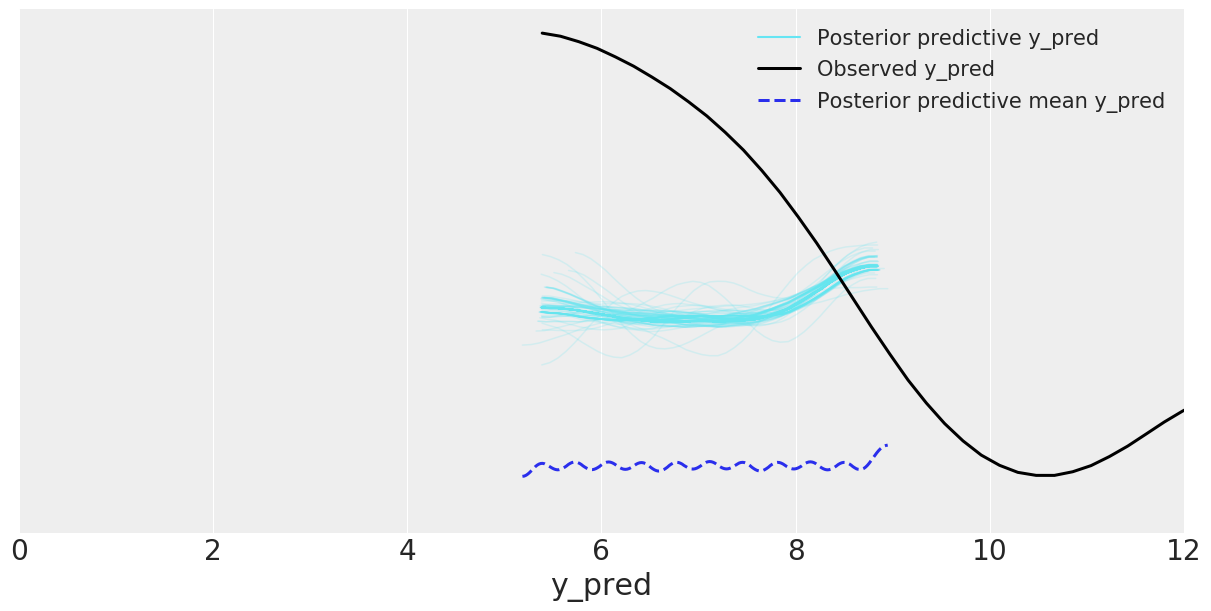

In [24]:
data_ppc = az.from_pymc3(trace=trace_t, posterior_predictive=ppc)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
plt.xlim(0, 12)
plt.savefig('B11197_03_12.png', dpi=300)

## Hierarchical linear regression

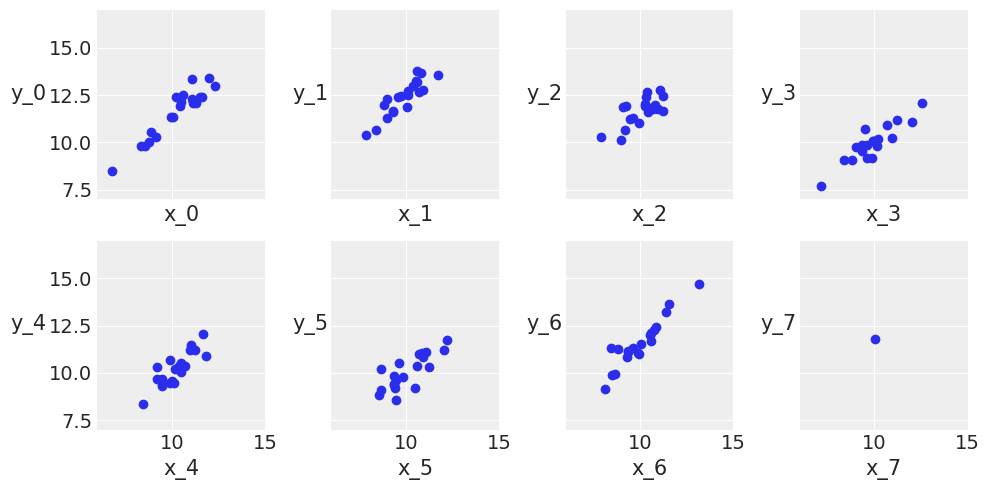

In [25]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout()
plt.savefig('B11197_03_13.png', dpi=300)

In [26]:
x_centered = x_m - x_m.mean()

In [27]:
with pm.Model() as unpooled_model:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10, shape=M)
    β = pm.Normal('β', mu=0, sd=10, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean())

    trace_up = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, ϵ, β, α_tmp]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:05<00:00, 886.26draws/s] 


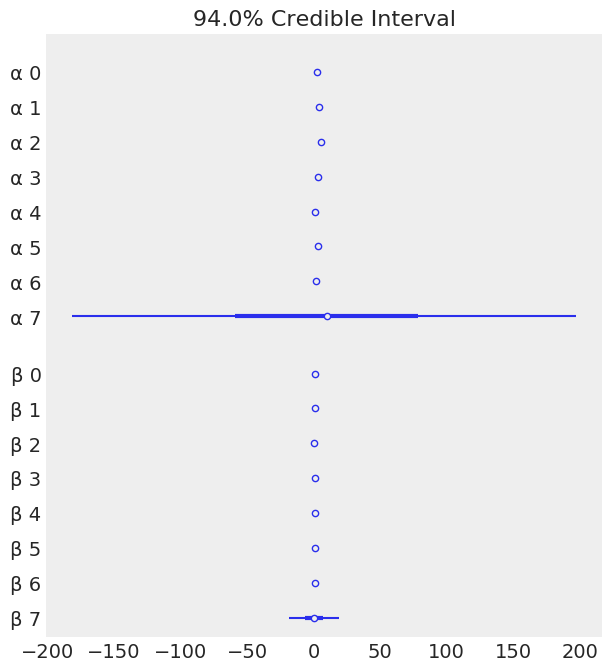

In [28]:
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True)
plt.savefig('B11197_03_14.png', dpi=300)


 <img src='B11197_03_15.png' width="700">

In [29]:
with pm.Model() as hierarchical_model:
    # hyper-priors
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0, sd=10)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10)
    β_μ = pm.Normal('β_μ', mu=0, sd=10)
    β_σ = pm.HalfNormal('β_σ', sd=10)

    # priors
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ * x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())

    trace_hm = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, ϵ, β, α_tmp, β_σ, β_μ, α_σ_tmp, α_μ_tmp]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:06<00:00, 450.97draws/s]
There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7186526118857864, but should be close to 0.8. Try to increase the number of tuning steps.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


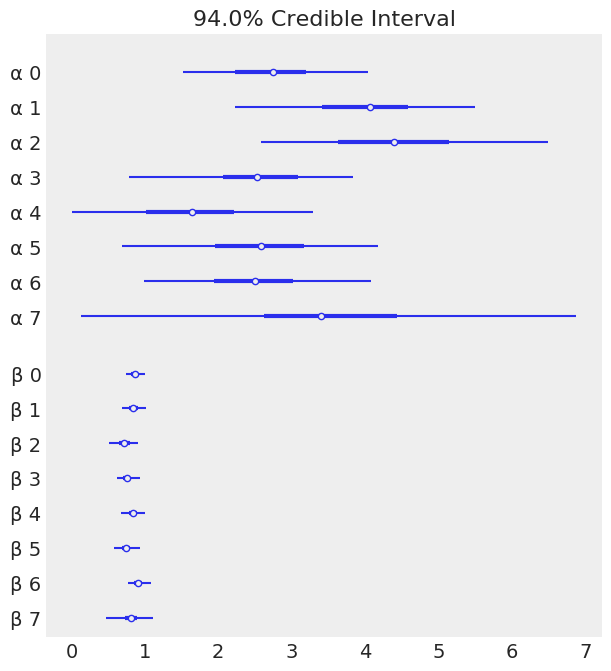

In [30]:
az.plot_forest(trace_hm, var_names=['α', 'β'], combined=True)
plt.savefig('B11197_03_16.png', dpi=300)

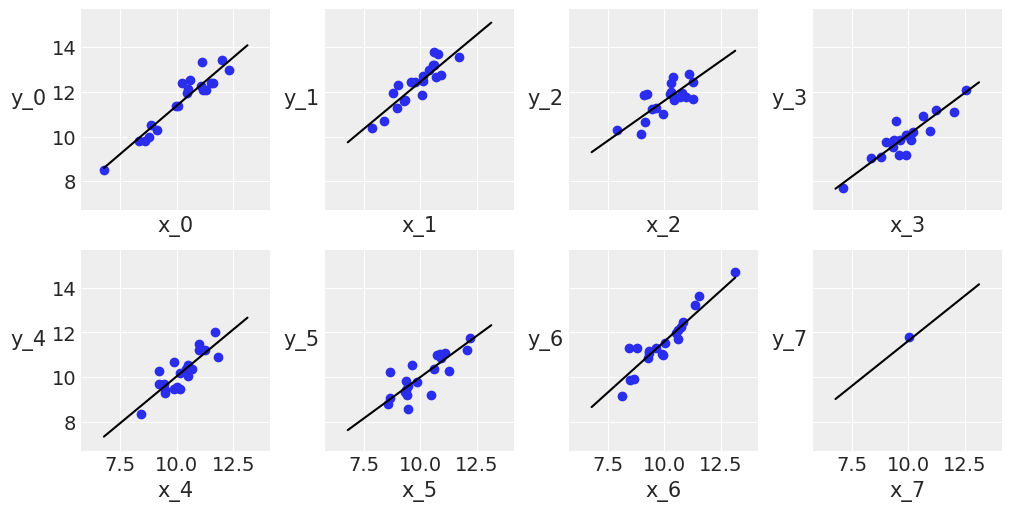

In [31]:
_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N
plt.savefig('B11197_03_17.png', dpi=300)

## Polynomial regression

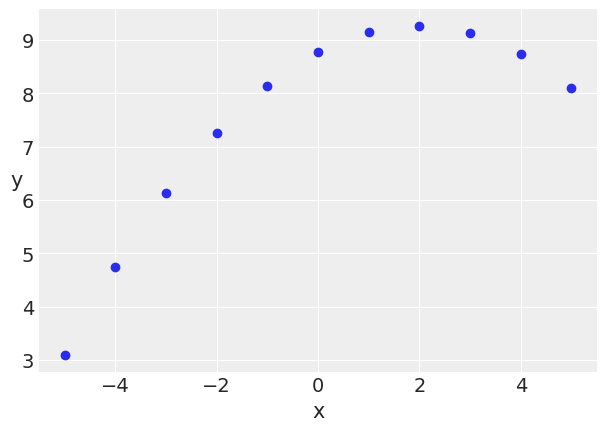

In [32]:
x_2 = ans[ans.group == 'II']['x'].values
y_2 = ans[ans.group == 'II']['y'].values
x_2 = x_2 - x_2.mean()

plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('B11197_03_18.png', dpi=300)

In [33]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    mu = α + β1 * x_2 + β2 * x_2**2

    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)

    trace_poly = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, β1, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:06<00:00, 757.07draws/s] 
The acceptance probability does not match the target. It is 0.9200935744990767, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9271833602014701, but should be close to 0.8. Try to increase the number of tuning steps.


In [34]:
#az.plot_trace(trace_poly);

In [35]:
#az.summary(trace_poly)

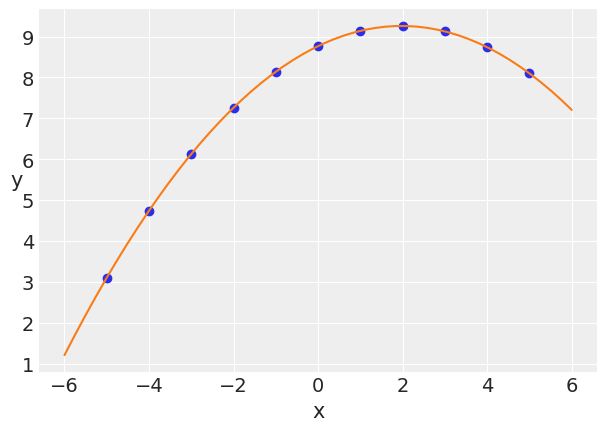

In [36]:
x_p = np.linspace(-6, 6)
y_p = trace_poly['α'].mean() + trace_poly['β1'].mean() * \
    x_p + trace_poly['β2'].mean() * x_p**2
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')
plt.savefig('B11197_03_19.png', dpi=300)

## Multiple Linear regression

In [37]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

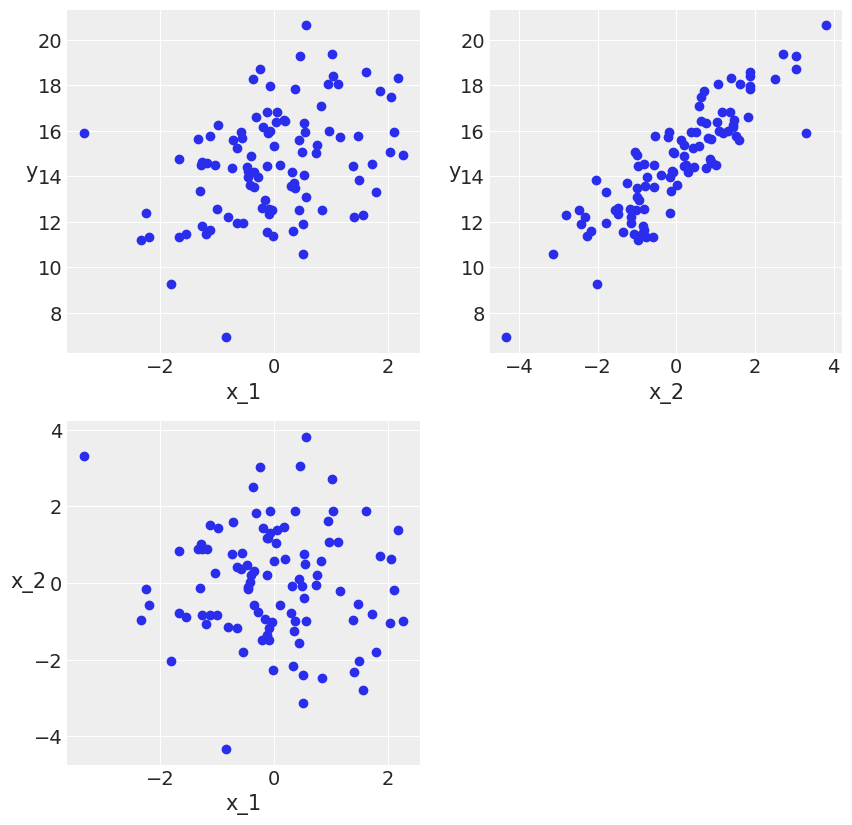

In [38]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'x_{idx+1}')
        plt.ylabel(f'y', rotation=0)

    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

scatter_plot(X_centered, y)
plt.savefig('B11197_03_20.png', dpi=300)

In [39]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α_tmp + pm.math.dot(X_centered, β)

    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_mlr = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α_tmp]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:03<00:00, 1471.76draws/s]
The acceptance probability does not match the target. It is 0.8842132479469446, but should be close to 0.8. Try to increase the number of tuning steps.


In [40]:
varnames = ['α', 'β', 'ϵ']
#az.plot_trace(trace_mlr, var_names=varnames);

In [41]:
az.summary(trace_mlr, var_names=varnames)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α[0],1.85,0.45,0.01,1.00,2.66,4497.0,1.0
β[0],0.97,0.04,0.00,0.89,1.05,4707.0,1.0
β[1],1.47,0.03,0.00,1.41,1.53,5243.0,1.0
ϵ,0.47,0.03,0.00,0.41,0.54,3330.0,1.0


## Confounding variables and redundant variables

In [42]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
#x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

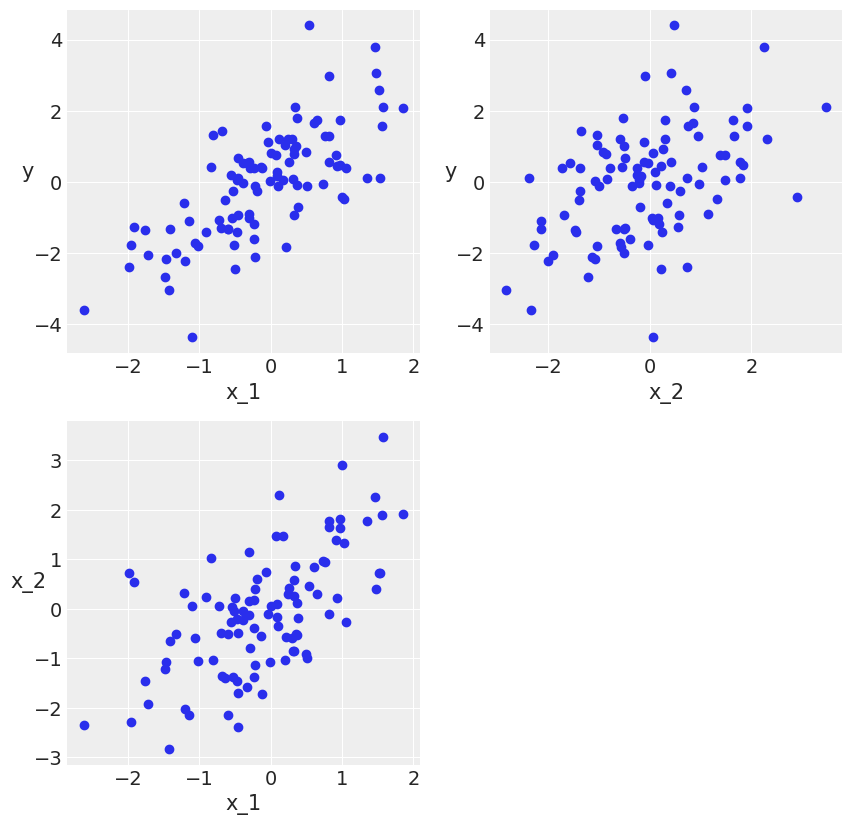

In [43]:
scatter_plot(X, y)
plt.savefig('B11197_03_21.png', dpi=300)

In [44]:
with pm.Model() as m_x1x2:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:, 0] + β2 * X[:, 1]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x1x2 = pm.sample(2000)


with pm.Model() as m_x1:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:, 0]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x1 = pm.sample(2000)

with pm.Model() as m_x2:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β2 * X[:, 1]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x2 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, β1, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:04<00:00, 1245.49draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β1, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:02<00:00, 2095.79draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:02<00:00, 2347.26draws/s]


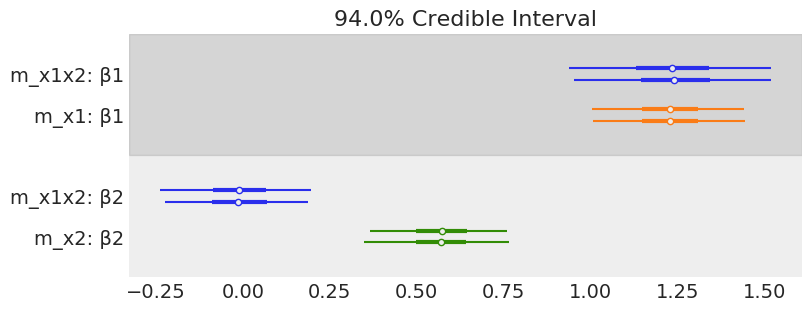

In [45]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2],
               model_names=['m_x1x2', 'm_x1', 'm_x2'],
               var_names=['β1', 'β2'],
               combined=False, colors='cycle', figsize=(8, 3))
plt.savefig('B11197_03_22.png', dpi=300)

In [46]:
# just repeating the code from a couple of cells before, but with a lower value of `scale`.
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

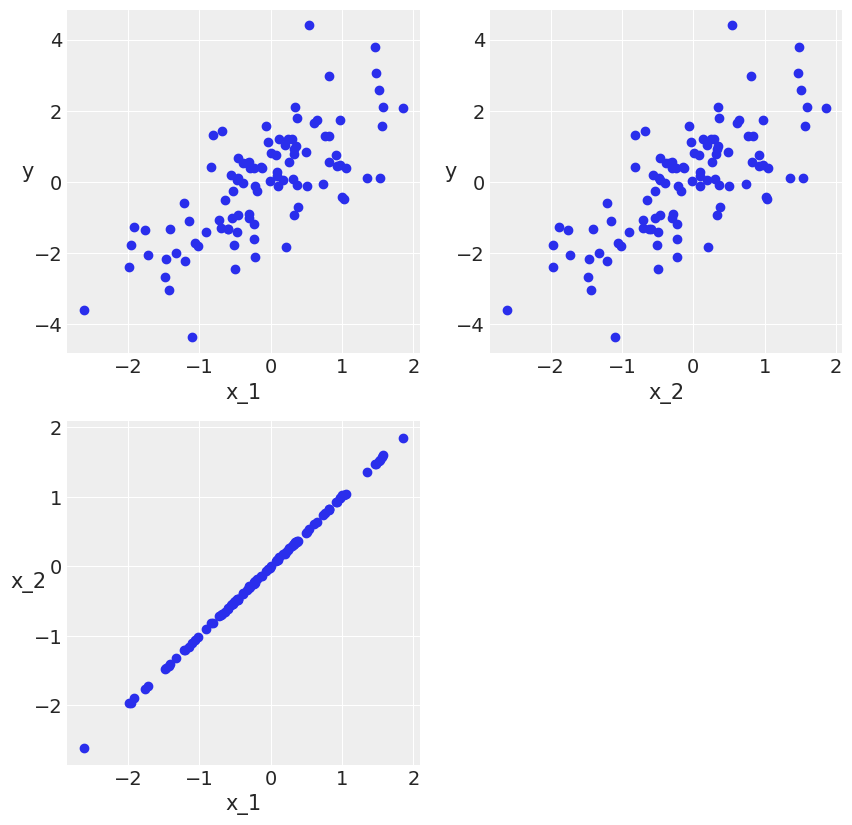

In [47]:
scatter_plot(X, y)
plt.savefig('B11197_03_23.png', dpi=300)

In [48]:
with pm.Model() as model_red:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + pm.math.dot(X, β)

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_red = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:57<00:00, 86.87draws/s] 


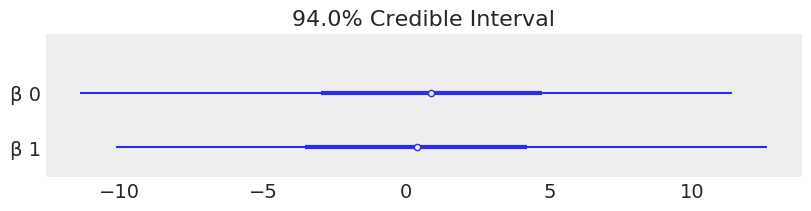

In [49]:
az.plot_forest(trace_red, var_names=['β'], combined=True, figsize=(8, 2))
plt.savefig('B11197_03_24.png', dpi=300)

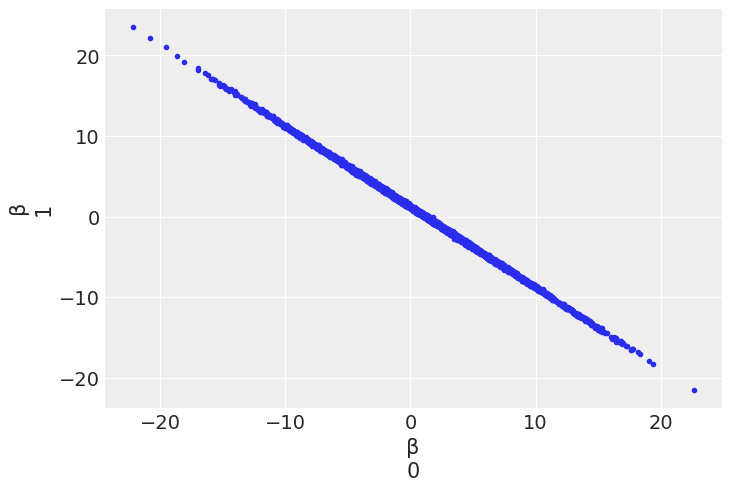

In [50]:
az.plot_pair(trace_red, var_names=['β'])
plt.savefig('B11197_03_25.png', dpi=300)

## Masking effect variables

In [51]:
np.random.seed(42)
N = 126
r = 0.8
x_1 = np.random.normal(size=N)
x_2 = np.random.normal(x_1, scale=(1 - r ** 2) ** 0.5)
y = np.random.normal(x_1 - x_2)
X = np.vstack((x_1, x_2)).T

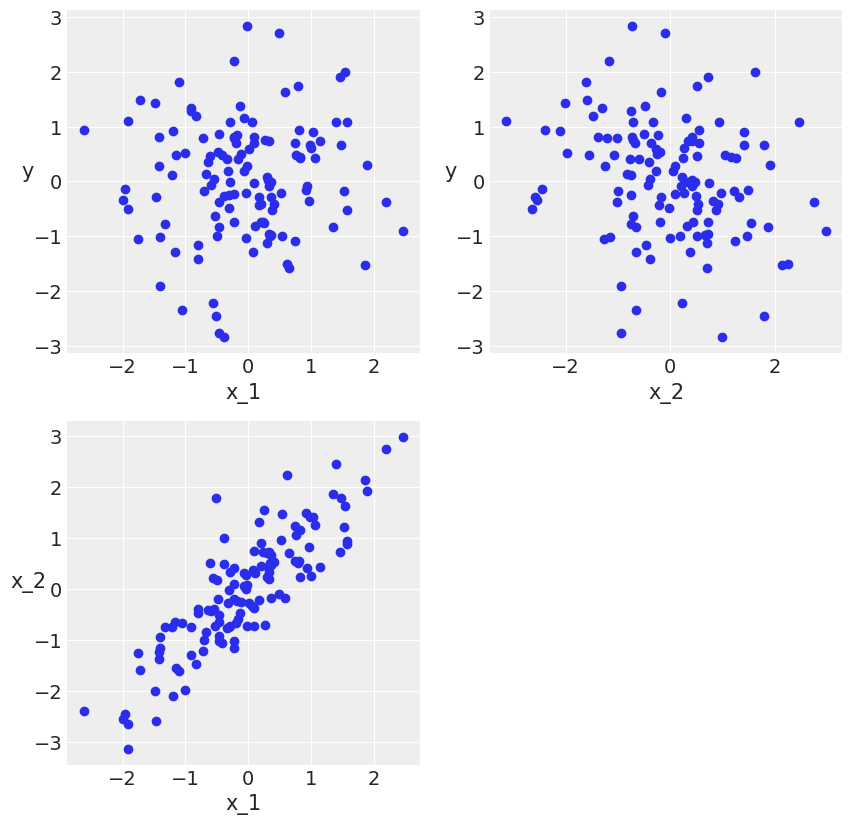

In [52]:
scatter_plot(X, y)
plt.savefig('B11197_03_26.png', dpi=300, figsize=(5.5, 5.5))

In [53]:
with pm.Model() as m_x1x2:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:, 0] + β2 * X[:, 1]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x1x2 = pm.sample(1000)


with pm.Model() as m_x1:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β1 * X[:, 0]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x1 = pm.sample(1000)

with pm.Model() as m_x2:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α + β2 * X[:, 1]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_x2 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, β1, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1322.95draws/s]
The acceptance probability does not match the target. It is 0.8799975731569054, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8794618209457493, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β1, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1637.94draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2421.14draws/s]


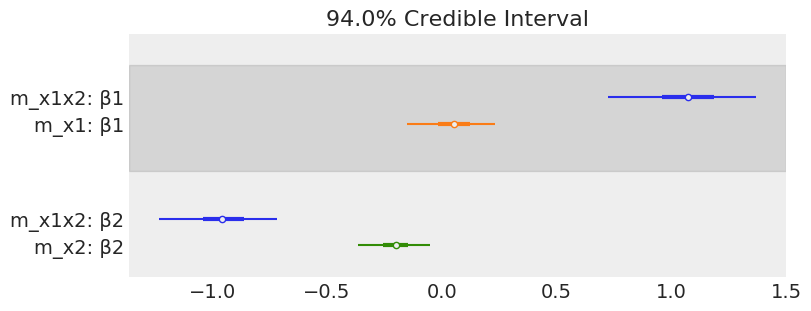

In [54]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2],
               model_names=['m_x1x2', 'm_x1', 'm_x2'],
               var_names=['β1', 'β2'],
               combined=True, colors='cycle', figsize=(8, 3))
plt.savefig('B11197_03_27.png', dpi=300, bbox_inches='tight')

## Variable variance

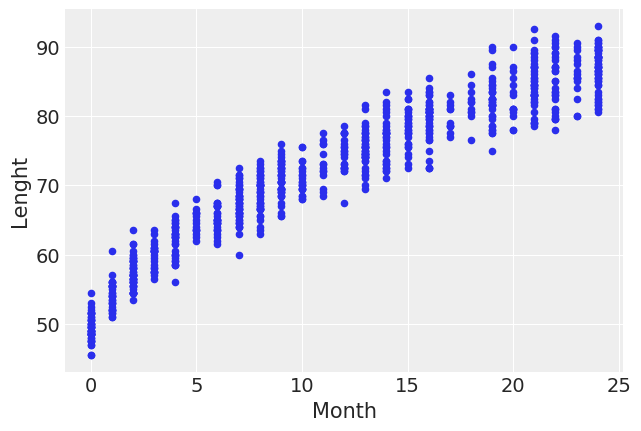

In [55]:
data = pd.read_csv('../data/babies.csv')
data.plot.scatter('Month', 'Lenght')
plt.savefig('B11197_03_28.png', dpi=300)

In [56]:
with pm.Model() as model_vv:
    α = pm.Normal('α', sd=10)
    β = pm.Normal('β', sd=10)
    γ = pm.HalfNormal('γ', sd=10)
    δ = pm.HalfNormal('δ', sd=10)

    x_shared = shared(data.Month.values * 1.)

    μ = pm.Deterministic('μ', α + β * x_shared**0.5)
    ϵ = pm.Deterministic('ϵ', γ + δ * x_shared)

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=data.Lenght)

    trace_vv = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [δ, γ, β, α]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:04<00:00, 891.33draws/s] 


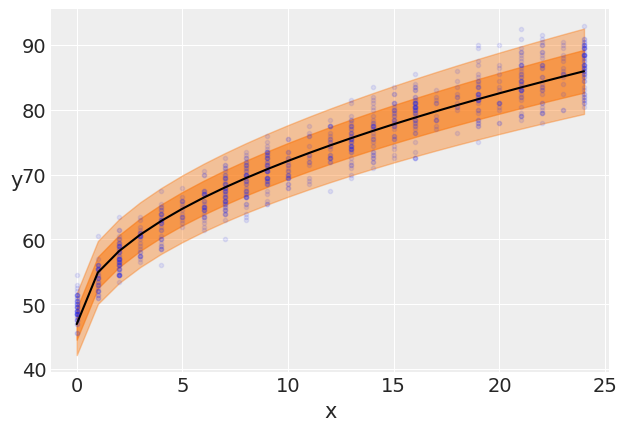

In [57]:
plt.plot(data.Month, data.Lenght, 'C0.', alpha=0.1)

μ_m = trace_vv['μ'].mean(0)
ϵ_m = trace_vv['ϵ'].mean(0)

plt.plot(data.Month, μ_m, c='k')
plt.fill_between(data.Month, μ_m + 1 * ϵ_m, μ_m -
                 1 * ϵ_m, alpha=0.6, color='C1')
plt.fill_between(data.Month, μ_m + 2 * ϵ_m, μ_m -
                 2 * ϵ_m, alpha=0.4, color='C1')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('B11197_03_29.png', dpi=300)

In [58]:
x_shared.set_value([0.5])
ppc = pm.sample_posterior_predictive(trace_vv, 2000, model=model_vv)
y_ppc = ppc['y_pred'][:, 0]

100%|██████████| 2000/2000 [00:01<00:00, 1526.30it/s]


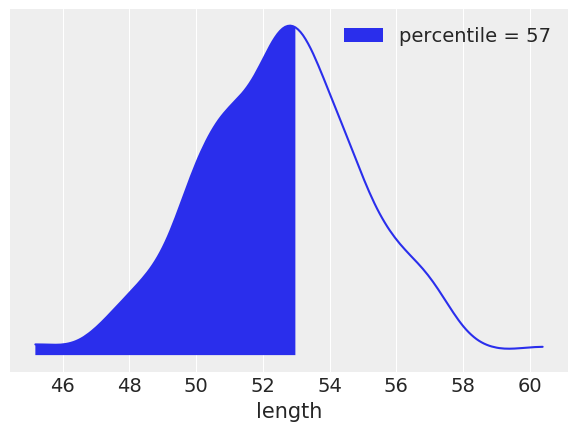

In [59]:
ref = 53
density, l, u = az._fast_kde(y_ppc)
x_ = np.linspace(l, u, 200)
plt.plot(x_, density)
percentile = int(sum(y_ppc <= ref) / len(y_ppc) * 100)
plt.fill_between(x_[x_ < ref], density[x_ < ref],
                 label='percentile = {:2d}'.format(percentile))
plt.xlabel('length')
plt.yticks([])
plt.legend()
plt.savefig('B11197_03_30.png', dpi=300)

In [ ]:
x_2 = ans[ans.group == 'IV']['x'].values
y_2 = ans[ans.group == 'IV']['y'].values

with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    #ν = pm.Gamma('ν', mu=20, sd=15)
    #ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    trace_t2 = pm.sample(2000)